In [507]:
import numpy as np
import pandas as pd
import seaborn as sns

import holidays

import datetime
import matplotlib.pyplot as plt

In [613]:
product_df = pd.read_pickle('product_df.pkl')
sale_df = pd.read_pickle('sale_df.pkl')
store_df = pd.read_pickle('store_df.pkl')

In [614]:
new_df = sale_df.merge(right = store_df, on = 'store_id')
df = new_df.merge(right = product_df, on = 'product_id')
df.head()

,date,product_id,store_id,sale_amount,store_address,product_barcode,product_name
0,2018-01-01,114893,6867,2.0,Жиновича,4811518013415,"Ветчина из мяса птицы ГАЛЕРЕЯ ВКУСА ""Умка"" руб..."
1,2018-01-02,114893,6867,1.0,Жиновича,4811518013415,"Ветчина из мяса птицы ГАЛЕРЕЯ ВКУСА ""Умка"" руб..."
2,2018-01-04,114893,6867,1.0,Жиновича,4811518013415,"Ветчина из мяса птицы ГАЛЕРЕЯ ВКУСА ""Умка"" руб..."
3,2018-01-06,114893,6867,1.0,Жиновича,4811518013415,"Ветчина из мяса птицы ГАЛЕРЕЯ ВКУСА ""Умка"" руб..."
4,2018-01-07,114893,6867,1.0,Жиновича,4811518013415,"Ветчина из мяса птицы ГАЛЕРЕЯ ВКУСА ""Умка"" руб..."


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887002 entries, 0 to 887001
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             887002 non-null  datetime64[ns]
 1   product_id       887002 non-null  object        
 2   store_id         887002 non-null  object        
 3   sale_amount      887002 non-null  float32       
 4   store_address    887002 non-null  category      
 5   product_barcode  887002 non-null  category      
 6   product_name     887002 non-null  category      
dtypes: category(3), datetime64[ns](1), float32(1), object(2)
memory usage: 34.7+ MB


## Добавление/удаление данных

In [638]:
df['year'] = df['date'].apply(lambda el: el.year)
df['month'] = df['date'].apply(lambda el: el.month)
#Monday is indexed as 0 and Sunday is 6.
df['weekday'] = df['date'].apply(lambda el: el.weekday())

In [616]:
holidays_b = []

for date, name in sorted(holidays.Belarus(years = range(2018, datetime.datetime.today().year + 1)).items()):
    holidays_b.append(date)

In [617]:
shop_region = {'Жиновича': 'Minsk', 'Мирошниченко': 'Minsk', 'Космонавтояв 28': 'Minsk', 'Каролинская': 'Minsk', 'Виталюр': 'Minsk', 'Московское шоссе': 'Minsk', 'Партизанский': 'Minsk', 'Звезда': 'Minsk', 'Рабочий': 'Minsk', 'Я.Мавра': 'Minsk', 'Казимировская': 'Minsk', 'Голубева': 'Minsk', 'Рафиева': 'Minsk', 'Игуменский тракт': 'Minsk', 'Налибокская': 'Minsk', 'Уборевича': 'Minsk', 'Лопатина': 'Minsk', 'Лынькова': 'Minsk', 'Щетовка': 'Minsk', 'Мястровская': 'Minsk', 'Правда 20': 'Minsk', 'Некрасова': 'Minsk', 'Горецкого': 'Minsk', 'Ландера': 'Minsk', 'Космонавтов 5а': 'Minsk', 'Шевченко': 'Minsk', 'Правда 40': 'Minsk', 'Маяковского 16': 'Minsk', 'Притыцкого 40': 'Minsk', 'Плеханова 34': 'Minsk', 'Пушкина 37': 'Minsk', 'К.Либкнехта': 'Minsk', 'Уральская': 'Minsk', 'Кижеватова': 'Minsk', 'Голодеда 13': 'Minsk', 'Одинцова': 'Minsk', 'Рокоссовского': 'Minsk', 'Филимонова': 'Minsk', 'Левкова': 'Minsk', 'Кошевого': 'Minsk', 'Волоха': 'Minsk', 'Пушкина 24': 'Minsk', 'Логойский тракт': 'Minsk', 'Волгоградская': 'Minsk', 'Водолажского': 'Minsk', 'Тарханова': 'Minsk', 'Андреевская 11': 'Minsk',
               'Чкалова': 'Minsk', 'Калиновского 55': 'Minsk', 'Казинца 49': 'Minsk', 'К.Бор': 'Minsk', 'Голодеда 14': 'Minsk', 'Есенина': 'Minsk', 'Склад Гомель': 'Gomel', 'Склад Могилев': 'Mogilev', 'Восточная': 'Minsk', 'Маяковского 176': 'Minsk', 'Арендный склад': 'Minsk', 'Ольшевского': 'Minsk', 'Голодеда 34а': 'Minsk', 'Кальварийская': 'Minsk', 'ХОЗНУЖДЫ (2й СОРТ)': 'Minsk', 'Склад №2 (Спорный)': 'Minsk', 'Брак': 'Minsk', 'Космонавтов 28 (до модернизации)': 'Minsk','Космонавтов 28': 'Minsk', 'Солигорск': 'Minsk_reg', 'Радошковичи': 'Minsk_reg', 'Борисов Гр.4': 'Minsk_reg', 'Борисов Гаг.4а': 'Minsk_reg', 'Несвиж': 'Minsk_reg', 'Борисов Трусова': 'Minsk_reg', 'Слуцк Ленина 146': 'Minsk_reg', 'Дзержинск Фурм. 2': 'Minsk_reg', 'Жодино Сов.': 'Minsk_reg', 'Валерьяново Лог. 5а': 'Minsk_reg', 'Лида Ком 50': 'Grodno', 'Гродно Инд.шоссе 9': 'Grodno', 'Гродно Сув. 308-3': 'Grodno', 'Слоним Кос.': 'Grodno', 'Бобруйск Инт.22': 'Mogilev', 'Бобруйск Минская 149': 'Mogilev', 'Бобруйск Соц. 197': 'Mogilev', 'Бобруйск Парк': 'Mogilev', 'Склад Витебск': 'Vitebsk', 'Витебск Моск. 119': 'Vitebsk', 'Витебск Черн.26': 'Vitebsk', 'Барановичи Пром.16': 'Brest'}

df['region'] = df.store_address.apply(lambda s: shop_region[s])

In [618]:
product = pd.read_excel('df_product.xlsx')
product = product.drop(columns = 'Unnamed: 0')
product['product_id'] = product['product_id'].apply(lambda x: str(x))

df = df.merge(right = product, on = 'product_id')

In [619]:
df['product_type'] = df['product_type'].apply(lambda x: 'сардельки' if x == 'сар' else x)

In [620]:
stores_scrap = pd.read_excel('stores_scrap.xlsx')
stores_scrap = stores_scrap.drop(columns = 'Unnamed: 0')
df = df.merge(right = stores_scrap, on = 'store_address')

In [621]:
df.drop(columns = 'who_eat', inplace = True)

In [622]:
df.shape

(887002, 13)

In [623]:
#df['year-month'] = df['date'].apply(lambda x: datetime.date(x.year, x.month, 1))

## Смотрим на производителя

In [624]:
df.manufacturer.unique()

array(['галерея вкуса', 'виталюр', 'ферма', 'производство'], dtype=object)

In [625]:
lst_g = []
lst_v = []
lst_f = []
lst_m = []

for i in df['date'].unique():
    tmp_m = df[df['date'] == i].groupby('manufacturer').sale_amount.mean()
    if ('галерея вкуса' in tmp_m.index):
        lst_g.append(tmp_m['галерея вкуса'])
    else:
        lst_g.append(0.)
    if ('виталюр' in tmp_m.index):
        lst_v.append(tmp_m['виталюр'])
    else:
        lst_v.append(0.)
    if ('ферма' in tmp_m.index):
        lst_f.append(tmp_m['ферма'])
    else:
        lst_f.append(0.)
    if ('производство' in tmp_m.index):
        lst_m.append(tmp_m['производство'])
    else:
        lst_m.append(0.)


In [626]:
tmp_df = pd.DataFrame({'date' : df['date'].unique(), 'mean_g' : lst_g, 'mean_v' : lst_v, 'mean_f' : lst_f, 'mean_m' : lst_m})

In [628]:
#fig_1 = plt.figure(figsize=(20, 8))
#axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
#
#axes_1.set_xlabel('Date', fontsize = 20)
#axes_1.set_ylabel('mean day', fontsize = 20)
#axes_1.set_title('manufactory production', fontsize = 30)

#axes_1.plot(tmp_df['year-month'],tmp_df.mean_m, label='manufactory', color = '#FA8072', linewidth=3)

#axes_1.legend(loc=0)

Товары, созданные на производстве, были в продаже всего пару дней, последниц раз - весной 2020, предсказывать их тяжко, ибо не понятно, когда они вообще появляются. Удалим их

In [629]:
tmp = df[df['manufacturer'] == 'производство']
tmp['product_name'].nunique()

2

И товара всего 2

In [630]:
df.drop(tmp.index, axis = 0, inplace = True)

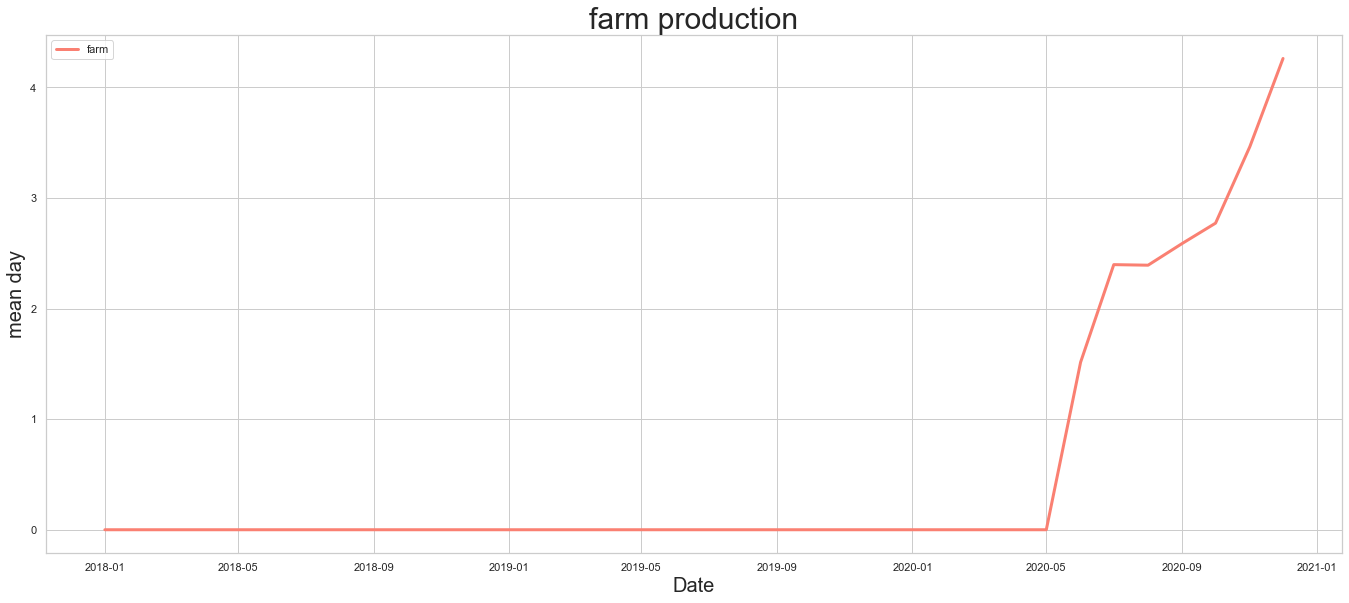

In [502]:
fig_1 = plt.figure(figsize=(20, 8))
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

axes_1.set_xlabel('Date', fontsize = 20)
axes_1.set_ylabel('mean day', fontsize = 20)
axes_1.set_title('farm production', fontsize = 30)

axes_1.plot(tmp_df['year-month'],tmp_df.mean_f, label='farm', color = '#FA8072', linewidth=3)

axes_1.legend(loc=0)

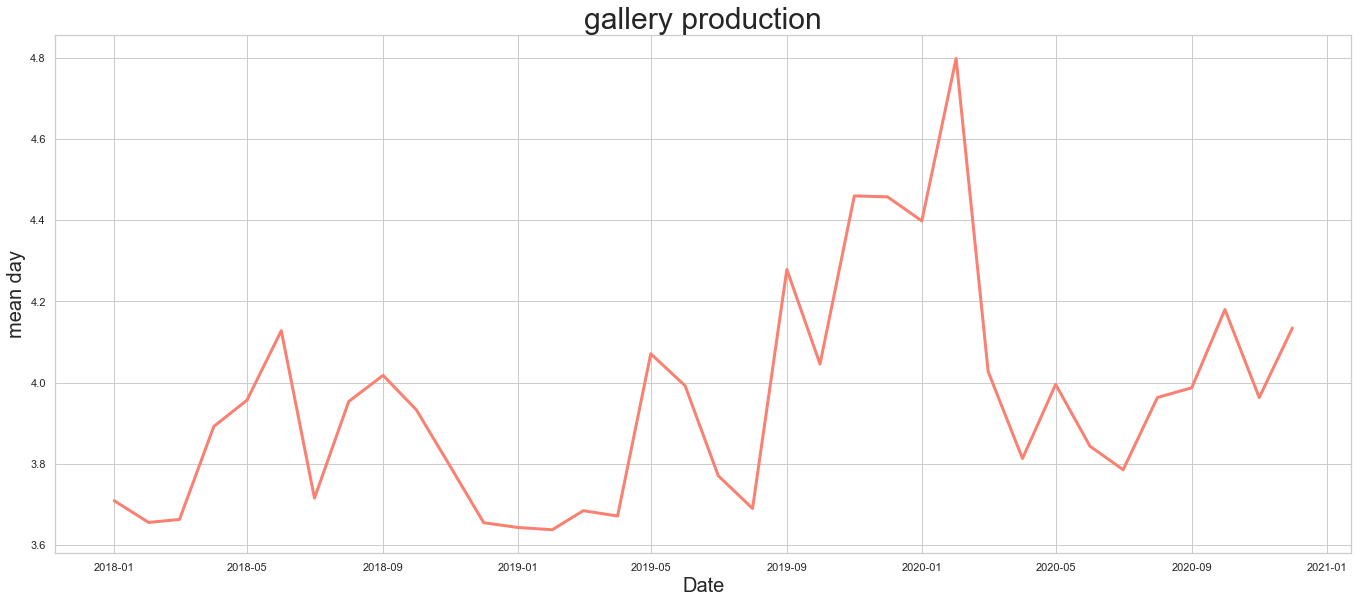

In [505]:
fig_1 = plt.figure(figsize=(20, 8))
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

axes_1.set_xlabel('Date', fontsize = 20)
axes_1.set_ylabel('mean day', fontsize = 20)
axes_1.set_title('gallery production', fontsize = 30)

axes_1.plot(tmp_df['year-month'],tmp_df.mean_g, label='gallery', color = '#FA8072', linewidth=3)

#axes_1.legend(loc=0)

### ------------------------------------------------------------------------------------------------------------------------------------------

## Смотрим на магазины и их продажи

In [631]:
df.store_id.nunique()

79

In [632]:
s_sales = {}
for id_s in df.store_id.unique():
    s_sales.update({id_s : []})

In [633]:
for d in np.sort(df['date'].unique()):
    tmp_m = df[df['date'] == d].groupby('store_id').sale_amount.sum()
#    print(tmp_m)
    for id_s in df['store_id'].unique():
        if (id_s in tmp_m.index):
            s_sales[id_s].append(tmp_m[id_s])
        else:
            s_sales[id_s].append(0.)

In [634]:
df_final['store_id'].unique()

array(['6867', '5858', '7743', '7967', '7562', '8177', '7088', '5699',
       '9142', '6043', '7090', '7245', '7822', '8175', '5796', '5912',
       '6035', '6360', '6361', '7740', '109', '6823', '6853', '7238',
       '7707', '8640', '7826', '9141', '7557', '7709', '8060', '8058',
       '6061', '5642', '6016', '5765', '7708', '5653', '10249', '9143',
       '10307', '10629', '10674', '11604', '6059', '11854', '12485',
       '12488', '8174', '13255', '13052', '12959', '13192', '13256',
       '14884', '15481', '15421', '15712', '16055', '15717', '16568',
       '16645', '16900', '16640', '16537', '17104', '17469', '17219',
       '18437', '18807', '19346', '19441', '19351', '19352'], dtype=object)

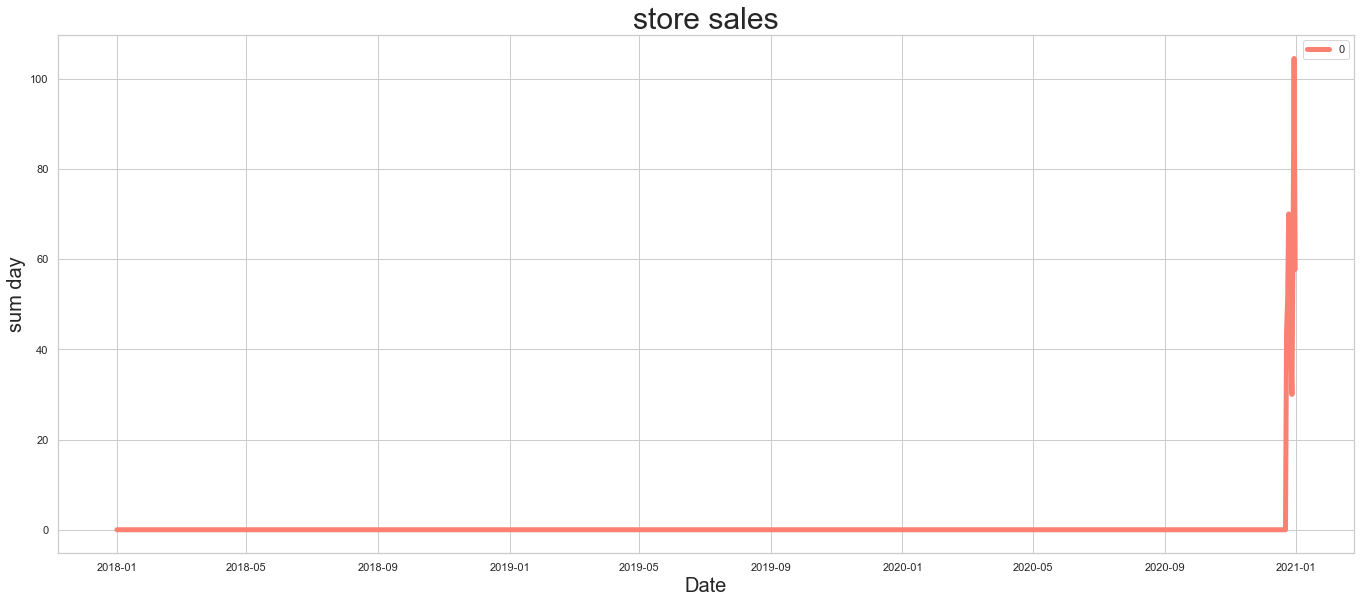

In [411]:
fig_6 = plt.figure(figsize=(20, 8))
axes_6 = fig_6.add_axes([0.1,0.1,0.9,0.9])

axes_6.set_xlabel('Date', fontsize = 20)
axes_6.set_ylabel('sum day', fontsize = 20)
axes_6.set_title('store sales', fontsize = 30)

axes_6.plot(np.sort(df['date'].unique()), s_sales['19352'], label='0', color = '#FA8072', linewidth=5)

axes_6.legend(loc=0)

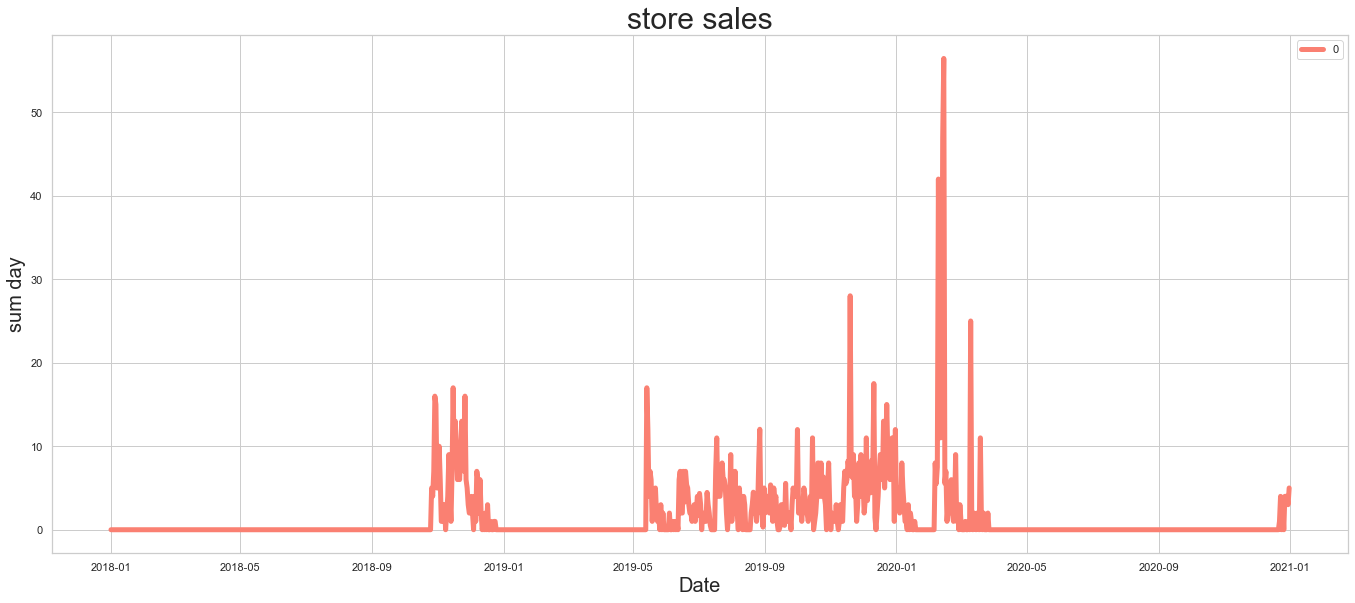

In [412]:
fig_5 = plt.figure(figsize=(20, 8))
axes_5 = fig_5.add_axes([0.1,0.1,0.9,0.9])

axes_5.set_xlabel('Date', fontsize = 20)
axes_5.set_ylabel('sum day', fontsize = 20)
axes_5.set_title('store sales', fontsize = 30)

axes_5.plot(np.sort(df['date'].unique()), s_sales['6059'], label='0', color = '#FA8072', linewidth=5)

axes_5.legend(loc=0)

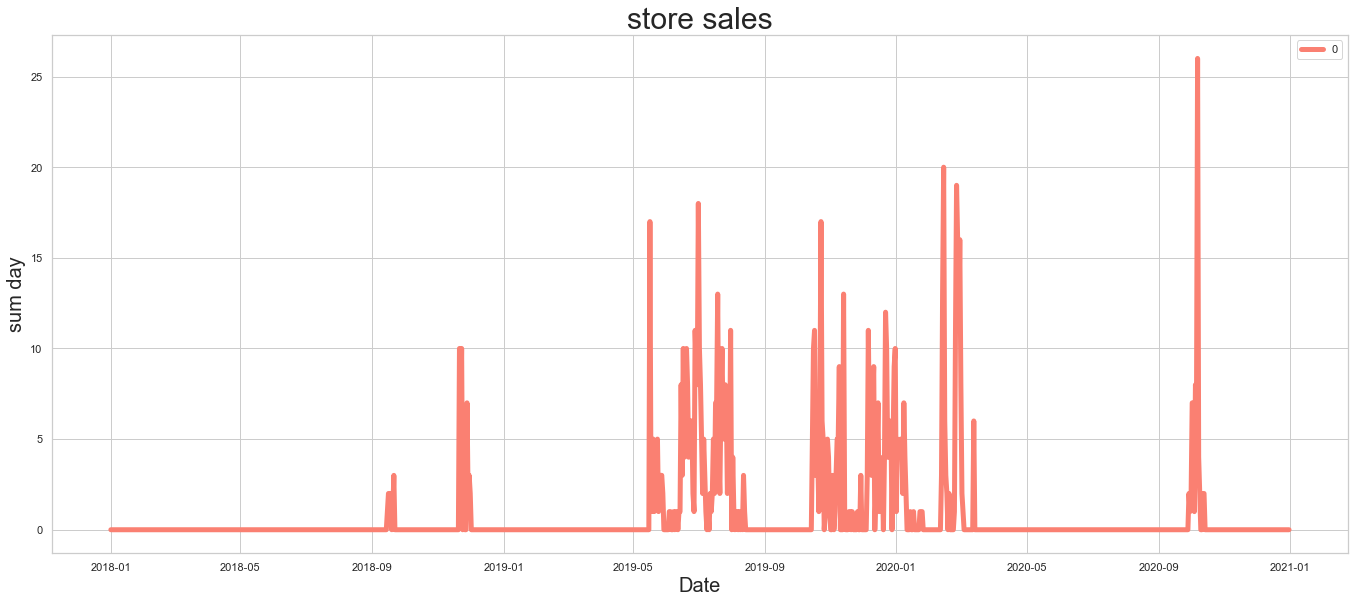

In [413]:
fig_4 = plt.figure(figsize=(20, 8))
axes_4 = fig_4.add_axes([0.1,0.1,0.9,0.9])

axes_4.set_xlabel('Date', fontsize = 20)
axes_4.set_ylabel('sum day', fontsize = 20)
axes_4.set_title('store sales', fontsize = 30)

axes_4.plot(np.sort(df['date'].unique()), s_sales['6034'], label='0', color = '#FA8072', linewidth=5)

axes_4.legend(loc=0)

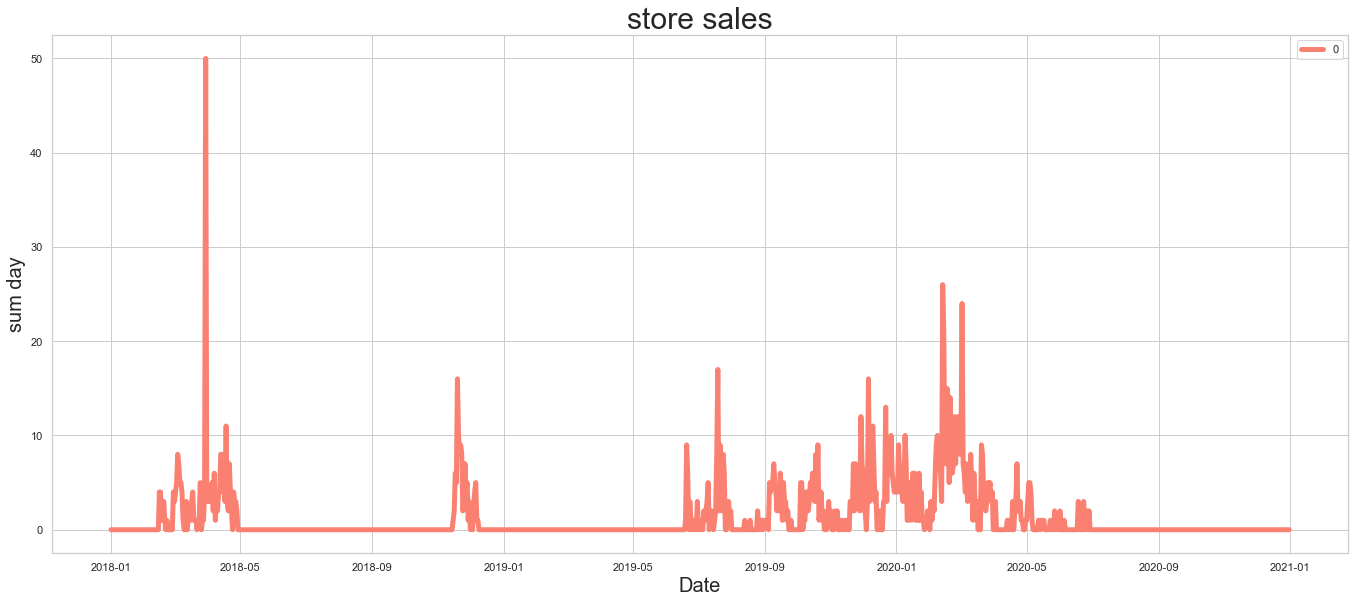

In [414]:
fig_3 = plt.figure(figsize=(20, 8))
axes_3 = fig_3.add_axes([0.1,0.1,0.9,0.9])

axes_3.set_xlabel('Date', fontsize = 20)
axes_3.set_ylabel('sum day', fontsize = 20)
axes_3.set_title('store sales', fontsize = 30)

axes_3.plot(np.sort(df['date'].unique()), s_sales['6033'], label='0', color = '#FA8072', linewidth=5)

axes_3.legend(loc=0)

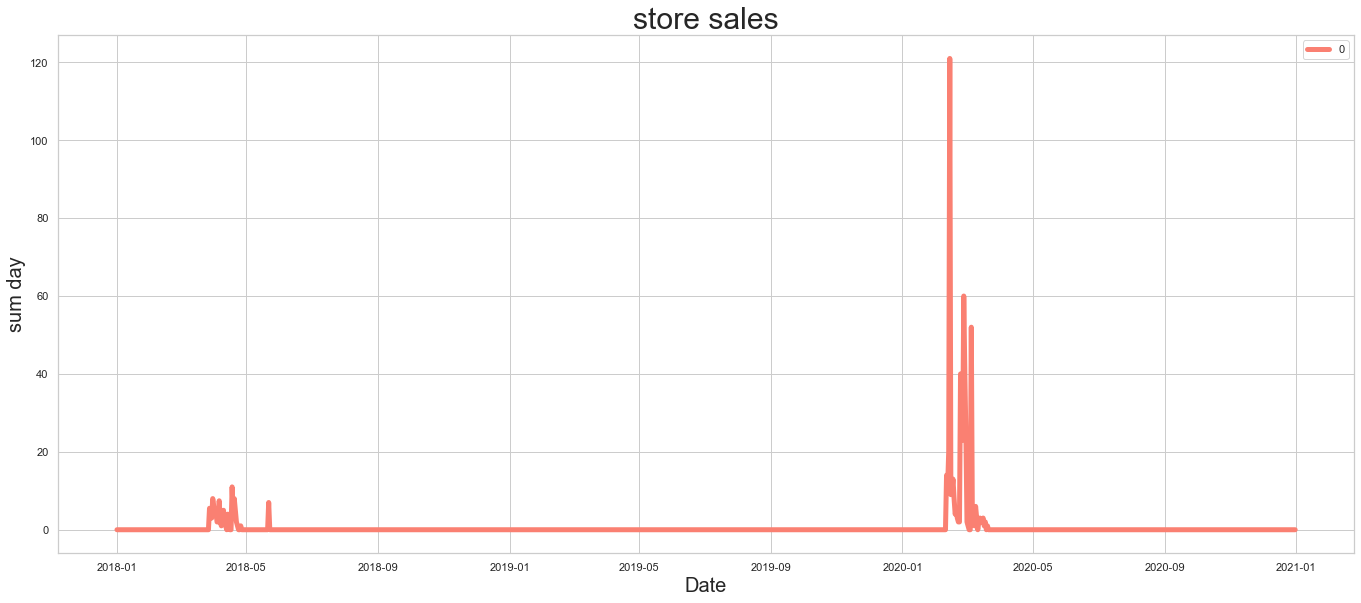

In [415]:
fig_7 = plt.figure(figsize=(20, 8))
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])

axes_7.set_xlabel('Date', fontsize = 20)
axes_7.set_ylabel('sum day', fontsize = 20)
axes_7.set_title('store sales', fontsize = 30)

axes_7.plot(np.sort(df['date'].unique()), s_sales['6037'], label='0', color = '#FA8072', linewidth=5)

axes_7.legend(loc=0)

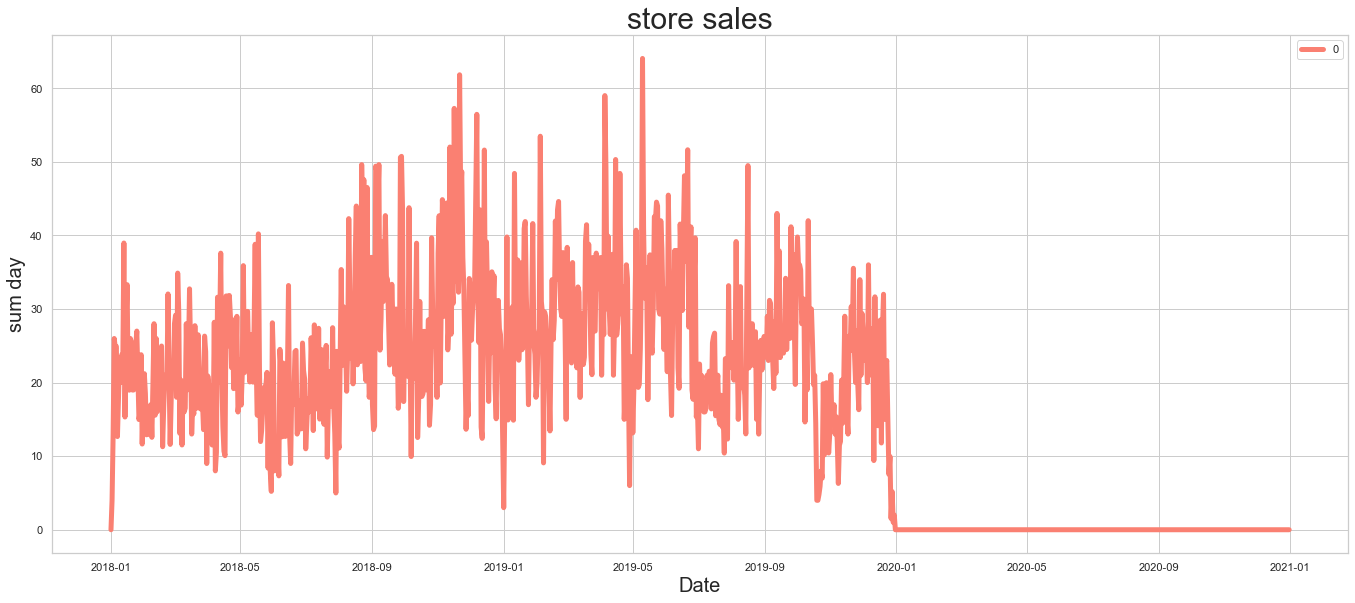

In [416]:
fig_2 = plt.figure(figsize=(20, 8))
axes_2 = fig_2.add_axes([0.1,0.1,0.9,0.9])

axes_2.set_xlabel('Date', fontsize = 20)
axes_2.set_ylabel('sum day', fontsize = 20)
axes_2.set_title('store sales', fontsize = 30)

axes_2.plot(np.sort(df['date'].unique()), s_sales['6115'], label='0', color = '#FA8072', linewidth=5)

axes_2.legend(loc=0)

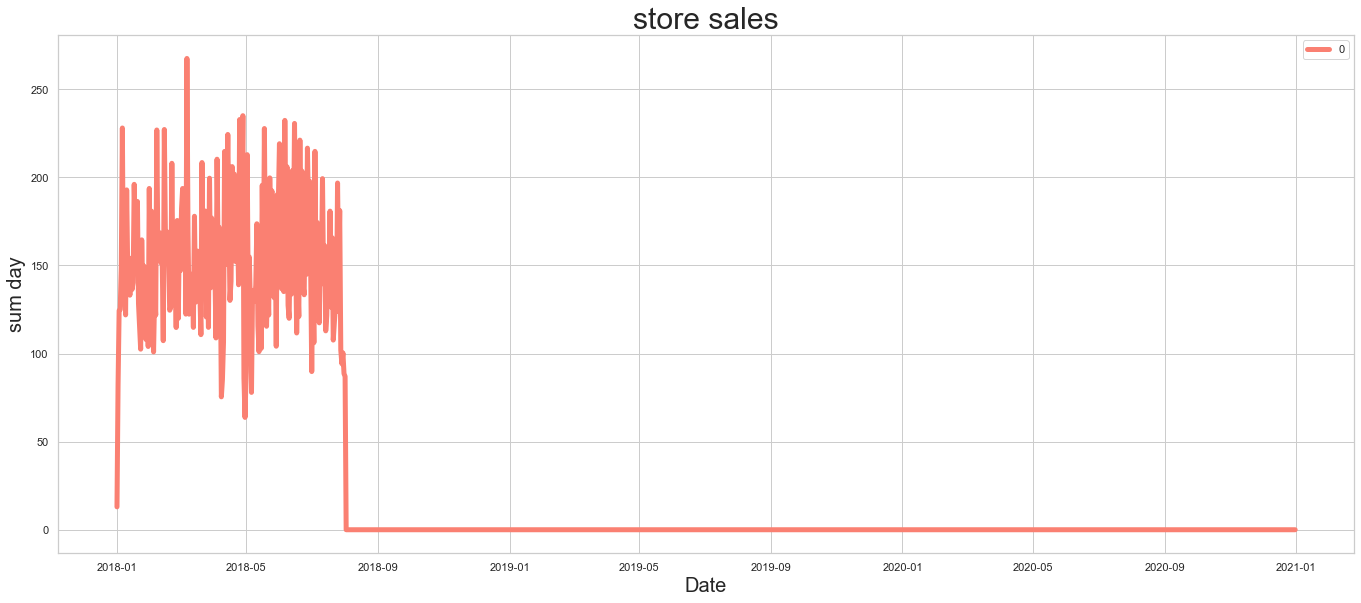

In [417]:
fig_6 = plt.figure(figsize=(20, 8))
axes_6 = fig_6.add_axes([0.1,0.1,0.9,0.9])

axes_6.set_xlabel('Date', fontsize = 20)
axes_6.set_ylabel('sum day', fontsize = 20)
axes_6.set_title('store sales', fontsize = 30)

axes_6.plot(np.sort(df['date'].unique()), s_sales['8174_old'], label='0', color = '#FA8072', linewidth=5)

axes_6.legend(loc=0)

In [635]:
df[(df['store_id'] == '8174_old') | (df['store_id'] == '6115') 
   | (df['store_id'] == '6033') | (df['store_id'] == '6037') 
   | (df['store_id'] == '6034')].groupby(['store_id', 'product_id']).sale_amount.count()

store_id  product_id
6033      122788         46
          122889        101
          123231         19
          124658          9
          131239        107
                       ... 
8174_old  85907         180
          86040         188
          86256         159
          86384          40
          88943          75
Name: sale_amount, Length: 131, dtype: int64

In [636]:
id_drop = df[(df['store_id'] == '8174_old') | (df['store_id'] == '6115') 
   | (df['store_id'] == '6033') | (df['store_id'] == '6037') 
   | (df['store_id'] == '6034')].index
df.drop(id_drop, axis = 0, inplace = True)

## Смотрим на продукты

In [639]:
tmp_df = df[df['year'] == 2020]
tmp_df = tmp_df[tmp_df['month'] >= 9]
tmp = tmp_df.groupby('product_id').sale_amount.sum().sort_values()
products_to_save = tmp.index

In [640]:
products_all = df['product_id'].values
products_to_drop = []

for id_p in products_all:
    if id_p in products_to_save:
        continue
    else:
        if not id_p in products_to_drop:
            products_to_drop.append(id_p)

In [641]:
fltr = []

for id_p in df['product_id']:
    if id_p in products_to_drop:
        fltr.append(True)
    else:
        fltr.append(False)
        
id_drop = df[fltr].index
df.drop(id_drop, axis = 0, inplace = True)

### ------------------------------------------------------------------------------------------------------------------------------------------

In [428]:
tmp_df = pd.DataFrame({'store_id' : df['store_id'], 'sale_amount' : df['sale_amount']})
tmp_df['meat_type'] = df['meat_type'].apply(lambda x: 'утка' if x == 'утка' else 'курица')


In [429]:
tmp_df.groupby('store_id').sale_amount.sum().sort_values(ascending = False)[0:10]

store_id
109     198622.375000
9142    178611.375000
8177    174759.187500
7967    153612.703125
7743    153172.703125
6867    146414.093750
8175    107891.734375
8174    107185.234375
6853    102630.257812
6823     87560.945312
Name: sale_amount, dtype: float32

In [430]:
tmp_df = tmp_df[(tmp_df['store_id'] == '109') 
                | (tmp_df['store_id'] == '9142') 
                   | (tmp_df['store_id'] == '8177') 
                   | (tmp_df['store_id'] == '7743') 
                   | (tmp_df['store_id'] == '7967')
                | (tmp_df['store_id'] == '6867')]

In [431]:
#tmp_df = pd.DataFrame({'region' : df['region'], 'sale_amount' : df['sale_amount']})
#tmp_df['meat_type'] = df['meat_type'].apply(lambda x: 'утка' if x == 'утка' else 'курица')


Text(0.5, 1.0, 'Утка vs Курица')

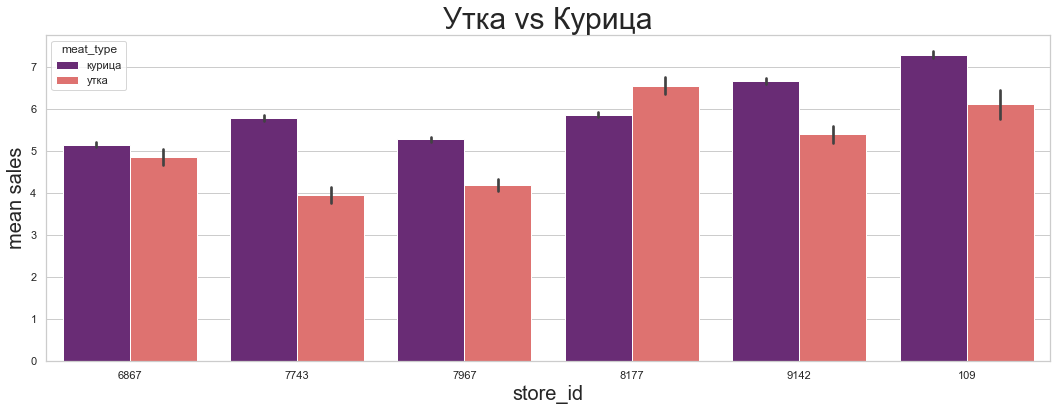

In [432]:
from numpy import mean


fig, ax = plt.subplots(figsize = (18, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x="store_id", y="sale_amount", hue="meat_type", data=tmp_df, palette = 'magma', estimator = mean)
ax.set_xlabel("store_id", fontsize=20)
ax.set_ylabel("mean sales", fontsize=20)
ax.set_title('Утка vs Курица', size = 30)

In [433]:
tmp_df = pd.DataFrame({'weekday' : df['weekday'], 'sale_amount' : df['sale_amount']})
tmp_df['region'] = df['region'].apply(lambda x: 'Minsk' if x == 'Minsk' else 'other')

Text(0.5, 1.0, 'weekday trend')

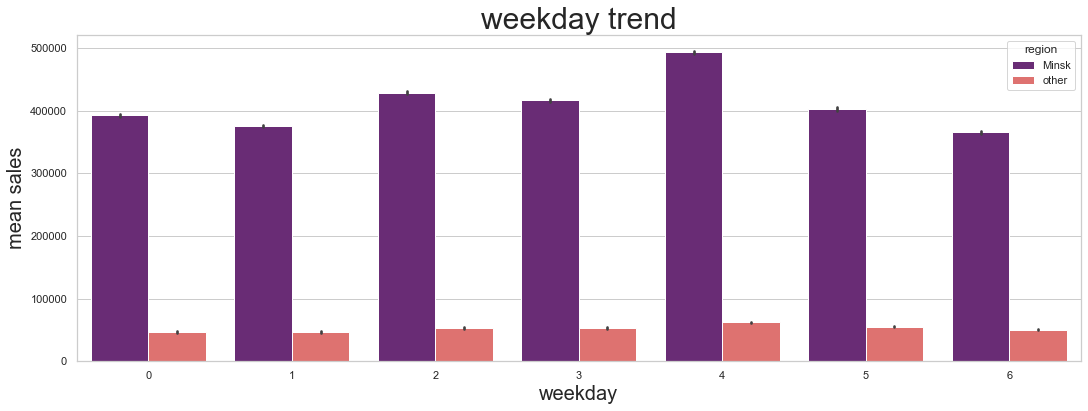

In [434]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x="weekday", y="sale_amount", hue="region", data=tmp_df, palette = 'magma', estimator = sum)
ax.set_xlabel("weekday", fontsize=20)
ax.set_ylabel("mean sales", fontsize=20)
ax.set_title('weekday trend', size = 30)

### ------------------------------------------------------------------------------------------------------------------------------------------

In [435]:
tmp = df.groupby('product_type').sale_amount.mean().sort_values(ascending = False)

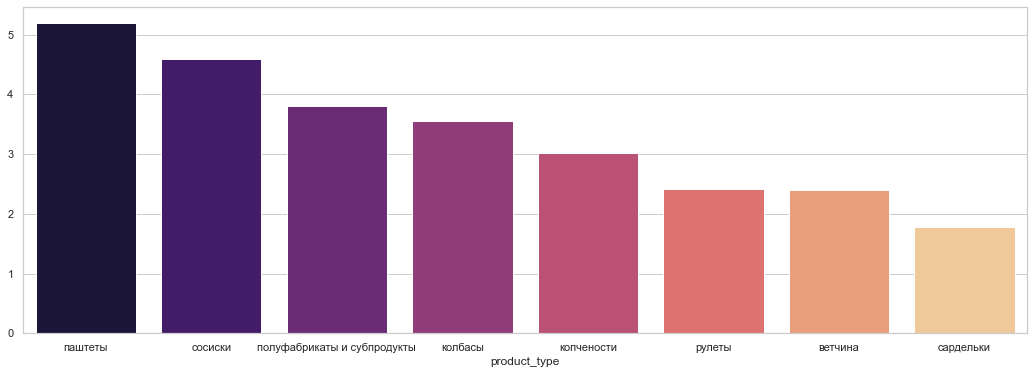

In [436]:
fig, ax = plt.subplots(figsize = (18, 6))
ax = sns.barplot(x=tmp.index, y=tmp.values,
                 palette="magma")

In [437]:
df['product_type'].unique()

array(['сосиски', 'рулеты', 'колбасы', 'паштеты',
       'полуфабрикаты и субпродукты', 'сардельки', 'копчености',
       'ветчина'], dtype=object)

In [438]:
tmp_df1 = df[df['product_type'] == 'сосиски'].groupby('date').sale_amount.sum()
tmp_df2 = df[df['product_type'] == 'колбасы'].groupby('date').sale_amount.sum()
tmp_df3 = df[df['product_type'] == 'полуфабрикаты и субпродукты'].groupby('date').sale_amount.sum()
tmp_df4 = df[df['product_type'] == 'паштеты'].groupby('date').sale_amount.sum()


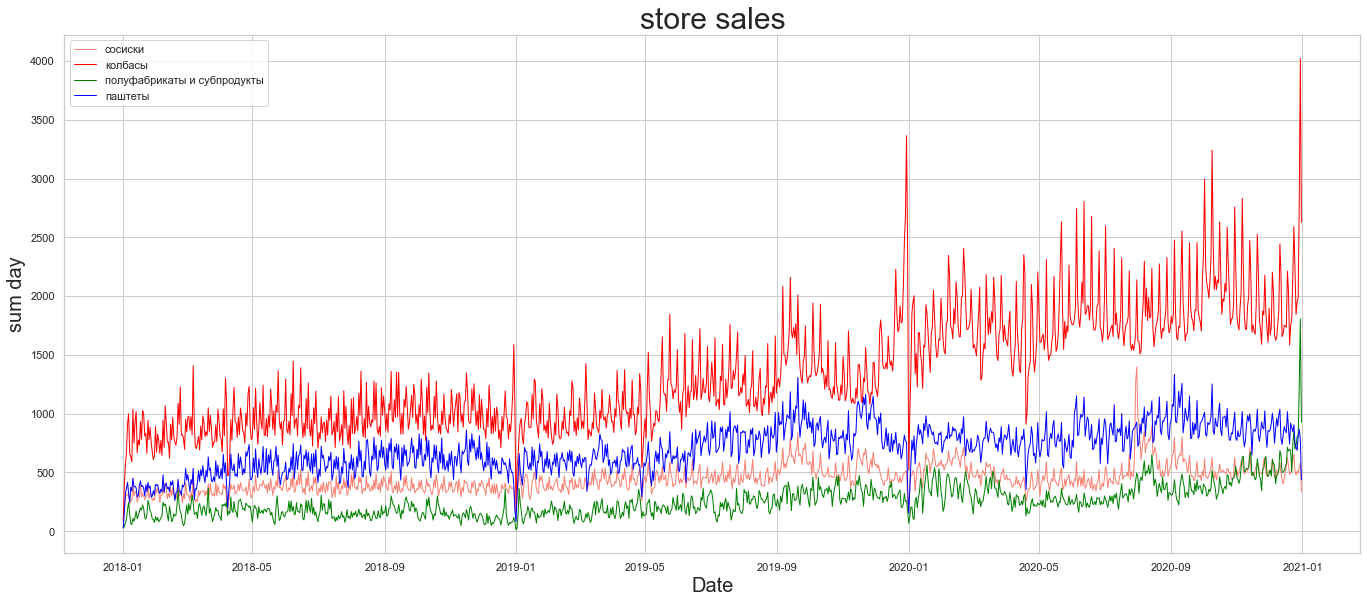

In [439]:
fig_7 = plt.figure(figsize=(20, 8))
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])

axes_7.set_xlabel('Date', fontsize = 20)
axes_7.set_ylabel('sum day', fontsize = 20)
axes_7.set_title('store sales', fontsize = 30)

axes_7.plot(tmp_df1.index, tmp_df1.values, label='сосиски', color = '#FA8072', linewidth=1)
axes_7.plot(tmp_df2.index, tmp_df2.values, label='колбасы', color = 'red', linewidth=1)
axes_7.plot(tmp_df3.index, tmp_df3.values, label='полуфабрикаты и субпродукты', color = 'green', linewidth=1)
axes_7.plot(tmp_df4.index, tmp_df4.values, label='паштеты', color = 'blue', linewidth=1)


axes_7.legend(loc=0)

In [440]:
df['region'].unique()

array(['Minsk', 'Mogilev', 'Minsk_reg', 'Grodno', 'Vitebsk', 'Brest'],
      dtype=object)

In [441]:
tmp_df1 = df[df['region'] == 'Minsk'].groupby('product_type').sale_amount.mean()
tmp_df2 = df[df['region'] == 'Minsk_reg'].groupby('product_type').sale_amount.mean()
tmp_df3 = df[df['region'] == 'Mogilev'].groupby('product_type').sale_amount.mean()
tmp_df4 = df[df['region'] == 'Grodno'].groupby('product_type').sale_amount.mean()
tmp_df5 = df[df['region'] == 'Vitebsk'].groupby('product_type').sale_amount.mean()
tmp_df6 = df[df['region'] == 'Brest'].groupby('product_type').sale_amount.mean()


([<matplotlib.patches.Wedge at 0x1dcbe904e20>,
 [Text(1.169627942334807, 0.3757428994800101, 'ветчина'),
  Text(0.5465195045944088, 1.1002402833462706, 'колбасы'),
  Text(-0.87849545736796, 0.8587537373332699, 'копчености'),
  Text(-1.0927356712330563, -0.5613742092533661, 'паштеты'),
  Text(-0.4635194143032535, -1.1377003131598271, 'полуфабрикаты и субпродукты'),
  Text(0.22311527298670622, -1.2080694619764492, 'рулеты'),
  Text(1.0633359391238724, -0.615247048402146, 'сосиски')],
 [Text(0.6683588241913183, 0.2147102282742915, '10%'),
  Text(0.3122968597682336, 0.6287087333407261, '16%'),
  Text(-0.5019974042102628, 0.49071642133329707, '24%'),
  Text(-0.6244203835617463, -0.32078526243049493, '15%'),
  Text(-0.26486823674471627, -0.6501144646627584, '7%'),
  Text(0.12749444170668928, -0.6903254068436853, '11%'),
  Text(0.6076205366422127, -0.35156974194408336, '17%')])

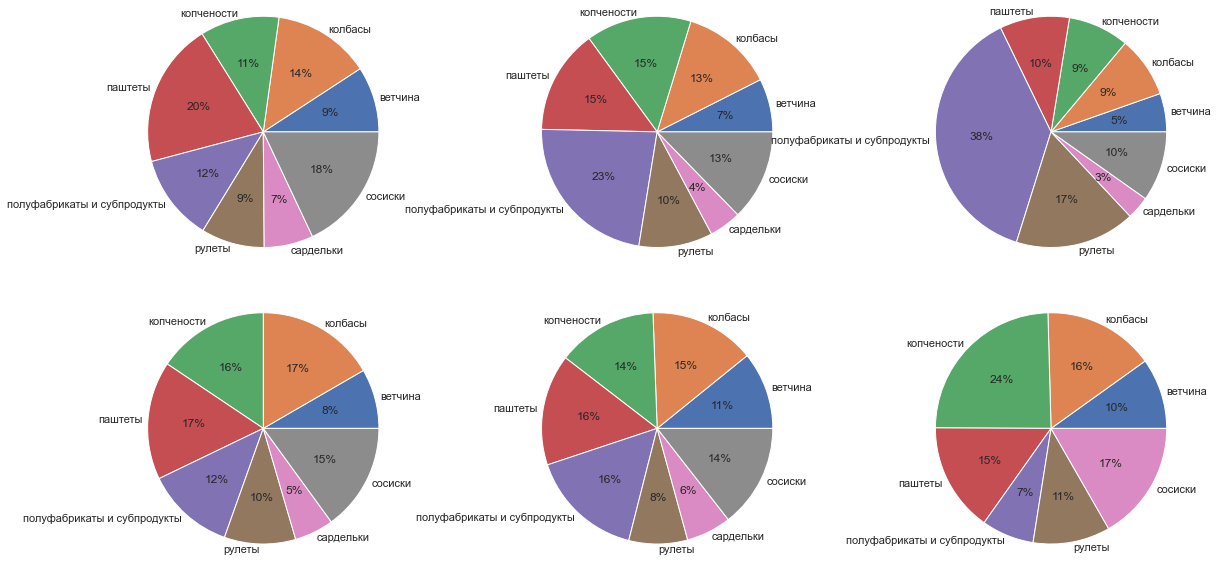

In [442]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.pie(tmp_df1, labels = tmp_df1.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)
plt.subplot(2, 3, 2)
plt.pie(tmp_df2, labels = tmp_df2.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)
plt.subplot(2, 3, 3)
plt.pie(tmp_df3, labels = tmp_df3.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)
plt.subplot(2, 3, 4)
plt.pie(tmp_df4, labels = tmp_df4.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)
plt.subplot(2, 3, 5)
plt.pie(tmp_df5, labels = tmp_df5.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)
plt.subplot(2, 3, 6)
plt.pie(tmp_df6, labels = tmp_df6.index, labeldistance = 1.05, autopct = '%1.0f%%', radius = 1.17)


In [642]:
df_final = df.drop(columns = ['rating', 'meat_type', 'product_barcode', 'year'])
df_final.head()

,date,product_id,store_id,sale_amount,store_address,product_name,region,product_type,manufacturer,type,month,weekday
60,2018-01-01,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,0
61,2018-01-02,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,1
62,2018-01-03,123231,6867,9.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,2
63,2018-01-04,123231,6867,5.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,3
64,2018-01-05,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,4


In [447]:
df_final.shape

(831223, 11)

In [448]:
df_final.to_csv('final.csv')

,date,product_id,store_id,sale_amount,store_address,product_name,weekday,is_holiday,region,product_type,manufacturer,type
60,2018-01-01,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",0,True,Minsk,сосиски,галерея вкуса,supermarket
61,2018-01-02,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",1,False,Minsk,сосиски,галерея вкуса,supermarket
62,2018-01-03,123231,6867,9.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2,False,Minsk,сосиски,галерея вкуса,supermarket
63,2018-01-04,123231,6867,5.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",3,False,Minsk,сосиски,галерея вкуса,supermarket
64,2018-01-05,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",4,False,Minsk,сосиски,галерея вкуса,supermarket


In [323]:
df_final['year-month'] = df['date'].apply(lambda x: datetime.date(x.year, x.month,1))

In [324]:
df_final.head()

,date,product_id,store_id,sale_amount,store_address,product_name,weekday,is_holiday,region,product_type,manufacturer,type,year-month
60,2018-01-01,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",0,True,Minsk,сосиски,галерея вкуса,supermarket,2018-01-01
61,2018-01-02,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",1,False,Minsk,сосиски,галерея вкуса,supermarket,2018-01-01
62,2018-01-03,123231,6867,9.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2,False,Minsk,сосиски,галерея вкуса,supermarket,2018-01-01
63,2018-01-04,123231,6867,5.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",3,False,Minsk,сосиски,галерея вкуса,supermarket,2018-01-01
64,2018-01-05,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",4,False,Minsk,сосиски,галерея вкуса,supermarket,2018-01-01


In [325]:
df_final.groupby(['store_id', 'product_id']).sale_amount.count()

store_id  product_id
10249     115760        354
          122788        416
          122889        574
          123231        665
          123232         88
                       ... 
9143      3899          599
          40712          66
          52089         374
          85782          46
          85906         208
Name: sale_amount, Length: 2877, dtype: int64

In [333]:
df[df['product_id'] == '247']

,date,product_id,store_id,sale_amount,store_address,product_barcode,product_name
800585,2018-11-07,247,6867,2.178,Жиновича,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
800586,2018-11-08,247,6867,2.462,Жиновича,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
800587,2018-11-14,247,6867,2.338,Жиновича,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
800588,2018-11-16,247,6867,2.450,Жиновича,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
800589,2018-12-14,247,6867,3.792,Жиновича,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
...,...,...,...,...,...,...,...
801028,2019-11-20,247,8174,1.788,Космонавтов 28,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
801029,2019-11-21,247,8174,2.242,Космонавтов 28,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
801030,2019-11-23,247,8174,4.126,Космонавтов 28,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...
801031,2019-11-24,247,8174,2.308,Космонавтов 28,4811518016225,ГАЛЕРЕЯ ВКУСА Мясо птицы. Тушка утенка 1 сорт ...


In [335]:
s_products = {}
for id_p in df.product_id.unique():
    s_products.update({id_p : []})

In [341]:
for d in np.sort(df['date'].unique()):
    tmp_m = df[df['date'] == d].groupby('product_id').sale_amount.sum()
#    print(tmp_m)
    for id_p in df['product_id'].unique():
        if (id_p in tmp_m.index):
            s_products[id_p].append(tmp_m[id_p])
        else:
            s_products[id_p].append(0.)

In [342]:
df['product_id'].unique()

array(['114893', '123231', '163583', '184902', '52089', '122889',
       '123233', '124657', '131803', '135182', '146509', '3897', '3899',
       '61835', '85782', '123232', '134464', '124340', '124342', '128255',
       '131239', '135179', '135180', '135181', '4307', '145278', '4306',
       '86040', '4310', '146512', '4308', '142263', '146511', '246',
       '148423', '149000', '148999', '150143', '85907', '115760',
       '122788', '139875', '124656', '183436', '86256', '129620',
       '131899', '13888', '154100', '154815', '15590', '124658', '156534',
       '247', '2916', '159555', '161221', '162938', '9499', '127137',
       '170728', '13750', '172910', '85906', '174968', '170729', '12266',
       '177721', '175419', '12552', '172911', '178196', '178653',
       '178654', '178900', '12845', '12848', '179631', '180047', '13259',
       '13258', '180048', '37571', '182106', '14906', '135178', '5521',
       '88943', '6898', '13517', '138379', '139486', '249', '243',
       '38236'

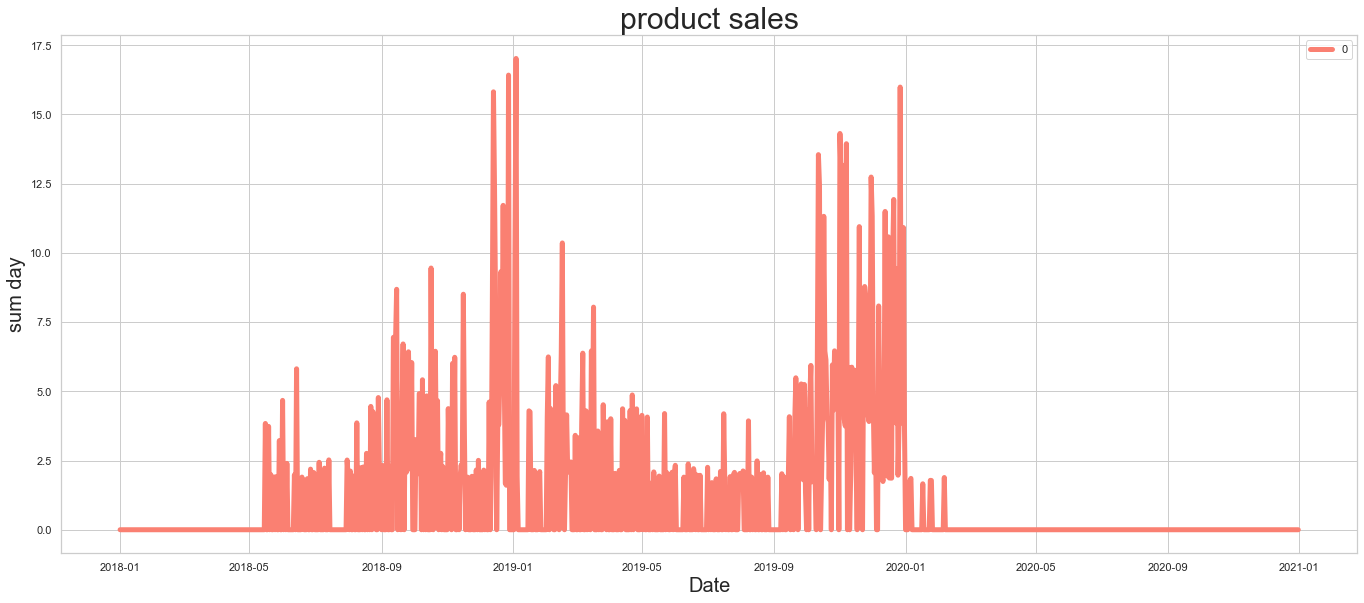

In [343]:
fig_9 = plt.figure(figsize=(20, 8))
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9])

axes_9.set_xlabel('Date', fontsize = 20)
axes_9.set_ylabel('sum day', fontsize = 20)
axes_9.set_title('product sales', fontsize = 30)

axes_9.plot(np.sort(df['date'].unique()), s_products['247'], label='0', color = '#FA8072', linewidth=5)

axes_9.legend(loc=0)

In [643]:
index_d = df_final[df_final['sale_amount'] == 0].index

In [644]:
df_final.drop(index_d, axis = 0, inplace = True)

In [478]:
df_final.groupby(['store_id', 'product_id']).date.count()

store_id  product_id
10249     115760        354
          122788        416
          122889        573
          123231        665
          123232         88
                       ... 
9143      3899          599
          40712          66
          52089         374
          85782          46
          85906         208
Name: date, Length: 3328, dtype: int64

In [474]:
df.groupby(['store_id']).date.count()

store_id
10249    12219
10307     8220
10629    16819
10674    19177
109      29011
         ...  
8177     31499
8640      3449
9141     20110
9142     29058
9143      7432
Name: date, Length: 79, dtype: int64

In [534]:
df.head()

,date,product_id,store_id,sale_amount,store_address,product_barcode,product_name,year,month,weekday,region,meat_type,product_type,manufacturer,rating,type
60,2018-01-01,123231,6867,3.0,Жиновича,4811518013729,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2018,1,0,Minsk,птица,сосиски,галерея вкуса,4.4,supermarket
61,2018-01-02,123231,6867,3.0,Жиновича,4811518013729,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2018,1,1,Minsk,птица,сосиски,галерея вкуса,4.4,supermarket
62,2018-01-03,123231,6867,9.0,Жиновича,4811518013729,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2018,1,2,Minsk,птица,сосиски,галерея вкуса,4.4,supermarket
63,2018-01-04,123231,6867,5.0,Жиновича,4811518013729,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2018,1,3,Minsk,птица,сосиски,галерея вкуса,4.4,supermarket
64,2018-01-05,123231,6867,3.0,Жиновича,4811518013729,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",2018,1,4,Minsk,птица,сосиски,галерея вкуса,4.4,supermarket


In [645]:
df_final = df.drop(columns = ['rating', 'meat_type', 'product_barcode', 'year', 'month'])
df_final.head()

,date,product_id,store_id,sale_amount,store_address,product_name,region,product_type,manufacturer,type,weekday
60,2018-01-01,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,0
61,2018-01-02,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1
62,2018-01-03,123231,6867,9.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,2
63,2018-01-04,123231,6867,5.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,3
64,2018-01-05,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,4


In [646]:
index_d = df_final[df_final['sale_amount'] == 0].index

In [647]:
df_final.drop(index_d, axis = 0, inplace = True)

In [538]:
df_final.groupby(['store_id', 'product_id']).date.count()

store_id  product_id
10249     115760        354
          122788        416
          122889        573
          123231        665
          123232         88
                       ... 
9143      3899          599
          40712          66
          52089         374
          85782          46
          85906         208
Name: date, Length: 2893, dtype: int64

In [540]:
df_final.shape

(788933, 11)

In [ ]:
df_final

In [648]:
df_tmp = df_final

In [649]:
df_tmp.sort_values(by = ['date', 'product_id'])

,date,product_id,store_id,sale_amount,store_address,product_name,region,product_type,manufacturer,type,weekday
39174,2018-01-01,115760,5858,5.0,Бобруйск Инт.22,"Сосиски ГАЛЕРЕЯ ВКУСА ""Умка"" для питания детей...",Mogilev,сосиски,галерея вкуса,minimarket,0
64409,2018-01-01,115760,7743,2.0,Мирошниченко,"Сосиски ГАЛЕРЕЯ ВКУСА ""Умка"" для питания детей...",Minsk,сосиски,галерея вкуса,supermarket,0
93651,2018-01-01,115760,7967,1.0,Щетовка,"Сосиски ГАЛЕРЕЯ ВКУСА ""Умка"" для питания детей...",Minsk,сосиски,галерея вкуса,supermarket,0
39988,2018-01-01,122788,5858,1.0,Бобруйск Инт.22,"Колбаса салями из мяса птицы ГАЛЕРЕЯ ВКУСА ""Ор...",Mogilev,колбасы,галерея вкуса,minimarket,0
65292,2018-01-01,122788,7743,1.0,Мирошниченко,"Колбаса салями из мяса птицы ГАЛЕРЕЯ ВКУСА ""Ор...",Minsk,колбасы,галерея вкуса,supermarket,0
...,...,...,...,...,...,...,...,...,...,...,...
811533,2020-12-31,86256,13255,5.0,Плеханова 34,"Продукт из мяса птицы ГАЛЕРЕЯ ВКУСА ""Снэки Евр...",Minsk,копчености,галерея вкуса,minimarket,3
849230,2020-12-31,86256,15712,5.0,Пушкина 37,"Продукт из мяса птицы ГАЛЕРЕЯ ВКУСА ""Снэки Евр...",Minsk,копчености,галерея вкуса,supermarket,3
864620,2020-12-31,86256,16568,5.0,Бобруйск Парк,"Продукт из мяса птицы ГАЛЕРЕЯ ВКУСА ""Снэки Евр...",Mogilev,копчености,галерея вкуса,supermarket,3
878384,2020-12-31,86256,17104,5.0,Голодеда 34а,"Продукт из мяса птицы ГАЛЕРЕЯ ВКУСА ""Снэки Евр...",Minsk,копчености,галерея вкуса,supermarket,3


In [650]:
date_sorted = np.sort(df_tmp.date.unique())
len(date_sorted)

date_sorted = date_sorted.astype(str)

for i in range(len(date_sorted)):
    date_sorted[i] = date_sorted[i][0:10]
    
date_sorted

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype='<U48')

In [651]:
d = {}


for i in range(157):
    for dt in date_sorted[i * 7 : (i + 1) * 7]:
        d[dt]=i

In [652]:
df_tmp['week'] = df_tmp['date'].apply(lambda x: d[str(x)[0:10]])

In [654]:
df_tmp.groupby(['week', 'product_id']).sale_amount.sum()

week  product_id
0     115760         205.0
      122788         468.0
      122889         398.0
      123231         616.0
      123232          40.0
                     ...  
156   85782         1676.0
      85906          567.0
      85907          337.0
      86040          243.0
      86256          414.0
Name: sale_amount, Length: 6424, dtype: float32

In [655]:
products = df_tmp['product_id'].unique()

In [601]:
d = {}

for p in products:
    tmp = df_tmp[df_tmp['product_id'] == p].groupby('week').sale_amount.count()
    d[p] = tmp

In [602]:
products

array(['123231', '163583', '184902', '52089', '122889', '123233',
       '131803', '135182', '146509', '3897', '3899', '61835', '85782',
       '123232', '128255', '131239', '135179', '135180', '135181',
       '86040', '148423', '149000', '148999', '150143', '85907', '115760',
       '122788', '139875', '124656', '183436', '86256', '129620',
       '131899', '15590', '156534', '161221', '170728', '13750', '85906',
       '170729', '12266', '177721', '178196', '178653', '178654',
       '178900', '12845', '12848', '179631', '180047', '13259', '13258',
       '180048', '37571', '182106', '14906', '5521', '14870', '12265',
       '40712', '166166'], dtype=object)

In [605]:
for p in products:
    print('====================================================================')
    print(p)
    print(d[p])
    print('====================================================================')
    

123231
week
0      160
1      162
2      154
3      165
4      166
      ... 
152    270
153    306
154    319
155    332
156    173
Name: sale_amount, Length: 157, dtype: int64
163583
week
0      107
1      138
2      132
3      128
4      130
      ... 
152    150
153    142
154    143
155    150
156    106
Name: sale_amount, Length: 157, dtype: int64
184902
week
0      191
1      210
2      209
3      220
4      230
      ... 
152    353
153    352
154    351
155    320
156    167
Name: sale_amount, Length: 157, dtype: int64
52089
week
0      231
1      239
2      240
3      227
4      223
      ... 
152    385
153    365
154    383
155    384
156    220
Name: sale_amount, Length: 157, dtype: int64
122889
week
0      169
1      195
2      206
3      199
4      191
      ... 
152    237
153    238
154    243
155    253
156    148
Name: sale_amount, Length: 157, dtype: int64
123233
week
0      126
1      146
2      157
3      149
4      138
      ... 
152    112
153    109
154    121


In [674]:
id_drop = df_tmp[(df_tmp['product_id'] == '170729') | (df_tmp['product_id'] == '123232') | (df_tmp['product_id'] == '135179') 
       | (df_tmp['product_id'] == '124656') | (df_tmp['product_id'] == '12266') | (df_tmp['product_id'] == '178900') 
       | (df_tmp['product_id'] == '166166') | (df_tmp['product_id'] == '40712') | (df_tmp['product_id'] == '12265') 
       | (df_tmp['product_id'] == '14870') | (df_tmp['product_id'] == '5521') | (df_tmp['product_id'] == '37571') 
       | (df_tmp['product_id'] == '129620') | (df_tmp['product_id'] == '12845') | (df_tmp['product_id'] == '12848') 
       | (df_tmp['product_id'] == '13259') | (df_tmp['product_id'] == '13258') | (df_tmp['product_id'] == '180048') 
       | (df_tmp['product_id'] == '1822106') | (df_tmp['product_id'] == '178169') | (df_tmp['product_id'] == '13750') 
       | (df_tmp['product_id'] == '161221') | (df_tmp['product_id'] == '15590') | (df_tmp['product_id'] == '115760') 
       | (df_tmp['product_id'] == '114823') | (df_tmp['product_id'] == '182106') | (df_tmp['product_id'] == '13258') 
                 | (df_tmp['product_id'] == '13259') | (df_tmp['product_id'] == '12848')].index

In [675]:
df_tmp.drop(id_drop, axis = 0, inplace = True)
#df_tmp.to_csv('FINAL.csv')

In [676]:
df_tmp

,date,product_id,store_id,sale_amount,store_address,product_name,region,product_type,manufacturer,type,weekday,week
60,2018-01-01,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,0,0
61,2018-01-02,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,1,0
62,2018-01-03,123231,6867,9.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,2,0
63,2018-01-04,123231,6867,5.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,3,0
64,2018-01-05,123231,6867,3.0,Жиновича,"Сосиски ГАЛЕРЕЯ ВКУСА ""Алфавитки детские"" д/пи...",Minsk,сосиски,галерея вкуса,supermarket,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886997,2020-12-25,180047,19352,4.0,Валерьяново Лог. 5а,"Сосиски из мяса птицы ГАЛЕРЕЯ ВКУСА ""Мортаделл...",Minsk_reg,сосиски,галерея вкуса,minimarket,4,155
886998,2020-12-26,180047,19352,2.0,Валерьяново Лог. 5а,"Сосиски из мяса птицы ГАЛЕРЕЯ ВКУСА ""Мортаделл...",Minsk_reg,сосиски,галерея вкуса,minimarket,5,155
886999,2020-12-29,180047,19352,1.0,Валерьяново Лог. 5а,"Сосиски из мяса птицы ГАЛЕРЕЯ ВКУСА ""Мортаделл...",Minsk_reg,сосиски,галерея вкуса,minimarket,1,156
887000,2020-12-30,180047,19352,7.0,Валерьяново Лог. 5а,"Сосиски из мяса птицы ГАЛЕРЕЯ ВКУСА ""Мортаделл...",Minsk_reg,сосиски,галерея вкуса,minimarket,2,156
